# Wavelength Loss Profile

Here for the N1 configuration of Bragg Fiber.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

# Initialize

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [3]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air]

ts = [4.0775e-05, 1e-5, 4.0775e-05]

mats = ['air', 'glass', 'air']

maxhs = [1, 1, 1]

# Four Layer Study: Glass outside Air (Outside Cladding)

In [4]:
betas1 = np.zeros_like(wls, dtype=complex)

for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=maxhs, wl=wl, mats=mats, ns=ns, no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess-1e-5j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.9999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .9999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 1.4e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (224.44266417866774-1.5514804123985976e-05j) . Residual of determinant:  8.846710779784738e-12 


     --------------------  2/301: wavelength: 1.4019999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (224.12239065688624-1.3541785752874707e-05j) . Residual of determinant:  2.3277292791528353e-11 


     --------------------  3/301: wavelength: 1.404e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (223.80303482911893-1.2030909236403956e-05j) . Residual of determinant:  2.8425866023507927e-11 


     --------------------  4/301: wavelength: 1.406e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (223.48459154608008-1.0856409740448282e-05j) . Residual of determinant:  2.4954223703834083e-11 


  

Scaled beta:  (214.62806739849879-5.354625690360355e-05j) . Residual of determinant:  1.5074324823648676e-12 


     --------------------  34/301: wavelength: 1.466e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (214.33503864691156-7.403610109424808e-05j) . Residual of determinant:  2.3334561992004523e-12 


     --------------------  35/301: wavelength: 1.468e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (214.04274079733247-0.00010951664160844014j) . Residual of determinant:  6.095844369602556e-12 


     --------------------  36/301: wavelength: 1.47e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (213.75111743404702-0.0001787349565106181j) . Residual of determinant:  6.1633045085047536e-12 


     --------------------  37/301: wavelength: 1.4719999999999998e-06  ---------

Scaled beta:  (206.17738654693818-9.172370747364534e-06j) . Residual of determinant:  3.555483796559754e-11 


     --------------------  64/301: wavelength: 1.5259999999999999e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.90709059105978-9.019347653849921e-06j) . Residual of determinant:  5.151994668638806e-11 


     --------------------  65/301: wavelength: 1.528e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (205.63750242102103-8.926021905828435e-06j) . Residual of determinant:  5.393080462908028e-11 


     --------------------  66/301: wavelength: 1.53e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (205.36861912349846-8.889331664384681e-06j) . Residual of determinant:  2.1151194194825603e-10 


     --------------------  67/301: wavelength: 1.532e-06  --------------------     

Boundary names not provided, using d

scaling guess: 1
Scaled beta:  (198.1126295070268-0.0006624233957156515j) . Residual of determinant:  4.512094722322958e-13 


     --------------------  95/301: wavelength: 1.5879999999999999e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
Scaled beta:  (197.86134221826939-0.0017231760249234744j) . Residual of determinant:  7.385782400681157e-14 


     --------------------  96/301: wavelength: 1.59e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling gues

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (191.82510154668861-1.2664072010759082e-05j) . Residual of determinant:  1.944598699750524e-11 


     --------------------  121/301: wavelength: 1.64e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (191.5910899528347-1.2256063113027909e-05j) . Residual of determinant:  6.881674657878785e-11 


     --------------------  122/301: wavelength: 1.642e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
Scaled beta:  (191.35764904943628-1.1924387952605231e-05j) . Residual of determinant:  1.5774899506841212e-11 


     --------------------  123/301: wavelength: 1.6439999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (191.1247

Scaled beta:  (184.82645705500704-5.114505323231898e-05j) . Residual of determinant:  4.932564750053855e-12 


     --------------------  152/301: wavelength: 1.702e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (184.60911896606572-6.0775590431942826e-05j) . Residual of determinant:  2.706657413564e-12 


     --------------------  153/301: wavelength: 1.704e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (184.39227290568175-7.362958284225312e-05j) . Residual of determinant:  9.93913667836233e-12 


     --------------------  154/301: wavelength: 1.7059999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (184.17591099451684-9.129436623354984e-05j) . Residual of determinant:  6.915822328046018e-12 


     --------------------  155/301: wavelength: 1.708e-06  --------------------     

Boundary names not

Scaled beta:  (179.95747542952373-5.702480655315759e-05j) . Residual of determinant:  1.6665755111462353e-12 


     --------------------  175/301: wavelength: 1.7479999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (179.75143687943807-4.93782244051031e-05j) . Residual of determinant:  3.1583542492884306e-12 


     --------------------  176/301: wavelength: 1.7499999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (179.54588013622532-4.33476333546324e-05j) . Residual of determinant:  1.10641245611204e-11 


     --------------------  177/301: wavelength: 1.752e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (179.3408012746112-3.851191687712981e-05j) . Residual of determinant:  4.352979583229731e-12 


     --------------------  178/301: wavelength: 1.7539999999999999e-06  ------------------

Scaled beta:  (173.7837027117323-1.5273582867996667e-05j) . Residual of determinant:  1.1773213521510067e-11 


     --------------------  206/301: wavelength: 1.8099999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (173.59159902527205-1.5606042201751814e-05j) . Residual of determinant:  1.50180705420512e-11 


     --------------------  207/301: wavelength: 1.8119999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (173.39991882542563-1.5998344634618534e-05j) . Residual of determinant:  1.6959314782073136e-11 


     --------------------  208/301: wavelength: 1.814e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (173.20866062550502-1.6455438044348794e-05j) . Residual of determinant:  3.971583159151709e-11 


     --------------------  209/301: wavelength: 1.8159999999999999e-06  --------------------     

Boundary names not 

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (168.01734923947757-0.0005084047009804255j) . Residual of determinant:  3.778288703246609e-13 


     --------------------  237/301: wavelength: 1.8719999999999998e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
Scaled beta:  (167.83708374825613-0.0007870303428628574j) . Residual of determinant:  1.629385363386004e-13 


     --------------------  238/301: wavelength: 1.8739999999999998e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (167.6568458812886-0.0013488974144139016j) . Residual of determinant:  1.3995735329358498e-13 


     --------------------  239/301: wavelength: 1.876e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (167.47637923079864-0.0026603513

scaling guess: 1
Scaled beta:  (163.81481888225753-4.219304117933588e-05j) . Residual of determinant:  5.654259985685953e-12 


     --------------------  261/301: wavelength: 1.92e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (163.64407636199704-3.9036658303445335e-05j) . Residual of determinant:  1.4075480673190207e-11 


     --------------------  262/301: wavelength: 1.922e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
Scaled beta:  (163.47369265011446-3.6321632254715976e-05j) . Residual of determinant:  1.2980029234717921e-11 


     --------------------  263/301: wavelength: 1.9239999999999997e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
Scaled beta:  (163.3036661328763-3.3972911426764857e-05j) . Residual of determinant:  5.720091407940392e-12 


     --------------------  264/301: wavelength: 1.926e-06  -----

scaling guess: 2
Scaled beta:  (158.8432970539865-1.9629955528219308e-05j) . Residual of determinant:  2.5339647582253354e-11 


     --------------------  291/301: wavelength: 1.9799999999999997e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (158.68277231955858-1.9917160396166397e-05j) . Residual of determinant:  8.935384534267656e-12 


     --------------------  292/301: wavelength: 1.982e-06  --------------------     

Boundary names not provided, using default names.
scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (158.5225711476065-2.0254008075153142e-05j) . Residual of determinant:  2.354715873997266e-11 


     --------------------  293/301: wavelength: 1.984e-06  --------------------     

Boundary names not provided, using default names.
Scaled beta:  (158.3626925057139-2.0643226203105457e-05j) . Residual of determinant:  5.413944137393223e-11 


     --------------------  294/301: wavelength: 1.985999999999999

In [6]:
# Formula for loss spikes from article

ms = np.arange(11,15,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d = 15*2/3*1e-6

Ls = (2 * n1 * d / ms * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
Ls

array([1.88042411e-06, 1.72372210e-06, 1.59112809e-06, 1.47747609e-06])

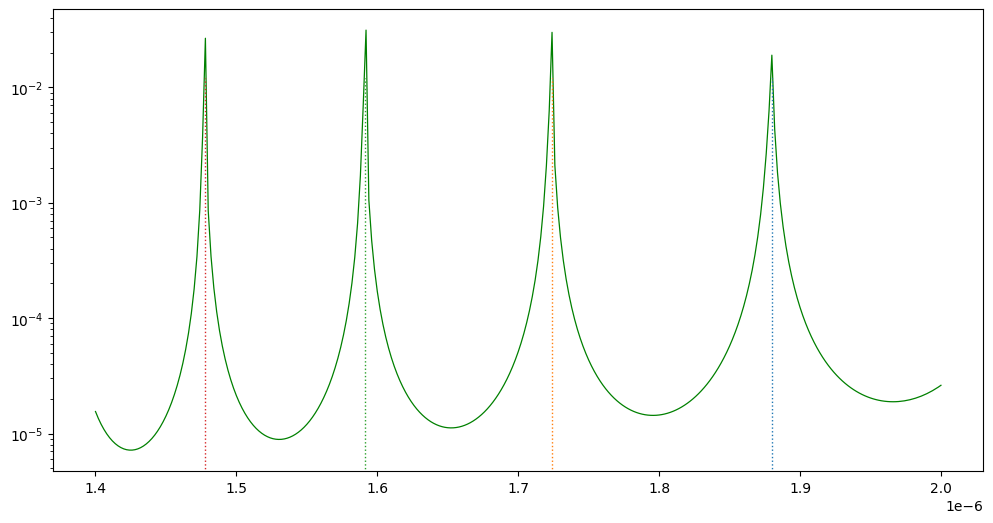

In [9]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in Ls:
    plt.plot([l,l], [0, .012],  linewidth=1, linestyle=':')

In [ ]:
# np.save('../../Air_Buffer_Thickness_Studies/N2_studies/data/N1_wls.npy', betas1)

# Using Sellmeier

In [ ]:
betas2=np.zeros_like(betas1)
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=[1 ,1, 1, 1], wl=wl)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

In [ ]:
ls_sell=np.load('ls_sell.npy')

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9, label='no sellmeier')
plt.plot(wls, -betas2.imag, color='red', linewidth=.9, label='sellmeier')
plt.yscale('log')
plt.legend()
for l in ls_sell:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='r',linestyle=':')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='g',linestyle=':')
